In [1]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import seaborn as sns
import scipy as sp
import math
import matplotlib.pyplot as plt
from plotly.offline import iplot
from scipy.spatial.distance import cosine
from plotly.offline import iplot
import plotly as py
import missingno as mno
import cufflinks as cf
import math 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from plotly.offline import iplot
#py.offline.init_notebook_mode(connected=True) 
#cf.go_offline() 

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("train.csv", skipinitialspace=True )

In [4]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [5]:
df[['mode']]

,mode
0,1.0
1,0.0
2,NaN
3,1.0
4,1.0
...,...
14995,NaN
14996,1.0
14997,NaN
14998,1.0


In [6]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

In [7]:
print(1 - cosine(df["duration_ms"], df["features_duration_ms"])) ## contengono gli stessi dati

0.9999826934770785


In [8]:
df=df.drop(['features_duration_ms'], axis=1)

In [9]:
df['duration_ms'] = df['duration_ms'].apply(lambda x: x/1000)

In [13]:
genres = sorted(df['genre'].unique())
genres_mapping = dict(zip(genres, range(0, len(genres) + 1)))
df['genres_val'] = df['genre'].map(genres_mapping).astype(int)

expl = sorted(df['explicit'].unique())
expl_mapping = dict(zip(expl, range(0, len(expl) + 1)))

df['explicit_val'] = df['explicit'].map(expl_mapping).astype(int)

In [14]:
#df=df.round(2)

## Regressione per predire i valori

In [15]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
genres_val                   0
explicit_val                 0
dtype: int64

In [16]:
df_nuovo=df.drop(['time_signature'], axis=1)

In [17]:
df_nuovo.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'n_beats', 'n_bars', 'popularity_confidence',
       'processing', 'genre', 'genres_val', 'explicit_val'],
      dtype='object')

In [18]:
df_nuovo=df_nuovo.drop(['mode'], axis=1)

In [19]:
df_nuovo.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'n_beats', 'n_bars', 'popularity_confidence',
       'processing', 'genre', 'genres_val', 'explicit_val'],
      dtype='object')

In [20]:
df_nuovo.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
genres_val                   0
explicit_val                 0
dtype: int64

In [21]:
df_nuovo.dtypes

name                      object
duration_ms              float64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
genres_val                 int64
explicit_val               int64
dtype: object

In [22]:
df.dtypes

name                      object
duration_ms              float64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
genres_val                 int64
explicit_val               int64
dtype: object

## Simple regression

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [24]:
df_train = df_nuovo[~df_nuovo['popularity_confidence'].isnull()]

In [25]:
df_train.isnull().sum()

name                     0
duration_ms              0
explicit                 0
popularity               0
artists                  0
album_name               0
danceability             0
energy                   0
key                      0
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
n_beats                  0
n_bars                   0
popularity_confidence    0
processing               0
genre                    0
genres_val               0
explicit_val             0
dtype: int64

In [27]:
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=42)

In [30]:
x_train = df_train[['duration_ms','danceability', 'energy','explicit_val','genres_val', 'key','instrumentalness', 'liveness', 'loudness', 'speechiness','valence', 'tempo', 'n_beats', 'acousticness', 'n_bars', 'processing', 'popularity']]
y_train = df_train["popularity_confidence"].values

x_test = df_test[['duration_ms','danceability', 'energy','explicit_val','genres_val','key','instrumentalness', 'liveness', 'loudness', 'speechiness','valence', 'tempo', 'n_beats', 'acousticness', 'n_bars', 'processing', 'popularity']]
y_test = df_test["popularity_confidence"].values

In [31]:
print(len(x_train), len(y_train))


1240 1240


## Linear Regression

In [38]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [39]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.00042151  0.03482805  0.03754914 -0.00554896 -0.00090509  0.00243982
 -0.00366891 -0.04722234  0.00214884  0.0062685  -0.04247305  0.00133662
 -0.00022595 -0.01209655 -0.00011147  0.00577096 -0.0002686 ]
Intercept: 
 0.35719782560504265


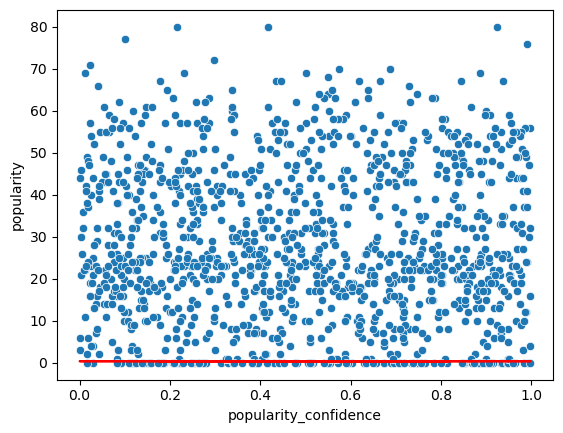

In [40]:
# Creazione dello scatter plot
sns.scatterplot(data=df_train, x="popularity_confidence", y="popularity")

# Tracciamento della retta di regressione
plt.plot(df_train["popularity_confidence"], reg.coef_[0] * df_train["popularity_confidence"] + reg.intercept_, color="red")

# Visualizzazione del grafico
plt.show()

In [41]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.007
MSE: 0.079
MAE: 0.238


## Ridge

In [36]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.00042256  0.03309816  0.03550798 -0.00523628 -0.00089407  0.00244043
 -0.00327831 -0.04611134  0.00220759  0.00591053 -0.04102003  0.00133911
 -0.0002253  -0.01249387 -0.0001149   0.00574424 -0.00027028]
Intercept: 
 0.3586816246139161


## Lasso 

In [37]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.52267533e-06 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00]
Intercept: 
 0.4943574563360471


## Time_signature 

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [46]:
df_nuovo_2=df.drop(['popularity_confidence', 'mode'], axis=1)

In [47]:
df_train = df_nuovo_2[~df_nuovo_2['time_signature'].isnull()]

In [48]:
df_train.isnull().sum()

name                0
duration_ms         0
explicit            0
popularity          0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64

In [49]:
df_train, df_test = train_test_split(df_train, test_size=0.3, random_state=100)

In [50]:
x_train = df_train[['duration_ms','danceability', 'energy','key','instrumentalness', 'liveness', 'loudness', 'speechiness','valence', 'tempo', 'n_beats', 'acousticness', 'n_bars', 'processing', 'popularity']]
y_train = df_train["time_signature"].values

x_test = df_test[['duration_ms','danceability', 'energy','key','instrumentalness', 'liveness', 'loudness', 'speechiness','valence', 'tempo', 'n_beats', 'acousticness', 'n_bars', 'processing', 'popularity']]
y_test = df_test["time_signature"].values

In [51]:
print(len(x_train), len(y_train))


9056 9056


## Linear Regression

In [52]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [53]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-2.62520295e-05  4.65177825e-01  1.00748847e-01  4.74557158e-04
 -1.95874889e-02 -1.31420719e-01  6.92021822e-03  3.14172051e-01
 -2.70469423e-02  2.07169912e-03  4.19483446e-03  1.21897192e-01
 -1.55246730e-02  5.77835165e-03 -3.03963086e-04]
Intercept: 
 3.235332153316142


In [54]:
# Creazione dello scatter plot
#sns.scatterplot(data=df_train, x="popularity_confidence", y="popularity")

# Tracciamento della retta di regressione
#plt.plot(df_train["popularity_confidence"], reg.coef_[0] * df_train["popularity_confidence"] + reg.intercept_, color="red")

# Visualizzazione del grafico
#plt.show()

In [55]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.232
MSE: 0.246
MAE: 0.226


## Ridge

In [56]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-2.64638733e-05  4.63081550e-01  9.97392925e-02  4.76012721e-04
 -1.95704517e-02 -1.31119853e-01  6.95178845e-03  3.09682639e-01
 -2.62110135e-02  2.07235053e-03  4.19520152e-03  1.21273192e-01
 -1.55267440e-02  5.75947879e-03 -3.06734914e-04]
Intercept: 
 3.2377170665455446


## Lasso 

In [57]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.00019189  0.          0.          0.         -0.         -0.
  0.          0.          0.          0.00167064  0.00294533 -0.
 -0.01051642  0.          0.        ]
Intercept: 
 3.590321780602784


## Mode Classificazione

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.cm as cm
import sklearn

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

#partitioning
from sklearn.model_selection import train_test_split

#knn
from sklearn.neighbors import KNeighborsClassifier

#crossvalidation
from sklearn.model_selection import cross_val_score

#grid search
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#naive bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#classificazione binaria
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

## Pre-processing

In [59]:
genres = sorted(df['genre'].unique())
genres_mapping = dict(zip(genres, range(0, len(genres) + 1)))
df['genres_val'] = df['genre'].map(genres_mapping).astype(int)

In [60]:
expl = sorted(df['explicit'].unique())
expl_mapping = dict(zip(expl, range(0, len(expl) + 1)))
df['explicit_val'] = df['explicit'].map(expl_mapping).astype(int)

In [61]:
df_nuovo3=df.drop(['name', 'explicit', 'artists','album_name', 'genre'], axis=1)

In [62]:
df_energy=df_nuovo3.copy()

def energy_mapping(energy):
    if energy <= 0.5:
        return 'Poco energetico'
    else:
        return 'Molto energetico'

df_energy['energy_map'] = df_energy['energy'].apply(lambda x: energy_mapping(x))

In [63]:
df_energy=df_energy.drop(["energy"], axis=1)

## Partitioning

In [64]:
X_train = df_energy.drop(["energy_map"], axis=1)
y_train=np.array(df_energy['energy_map'])

In [65]:
X = df_energy.drop(["energy_map"], axis=1)
Y = np.array(df_energy['energy_map'])

In [66]:
X=np.array(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, stratify=Y, random_state=0
)

In [70]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## KNN

In [71]:
clf = KNeighborsClassifier(n_neighbors=17, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_train_pred = clf.predict(X_train_norm)

In [ ]:
print(classification_report(y_train, y_train_pred))

In [ ]:
cf = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf, annot=True, cmap="Blues")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
y_train_pred_proba = clf.predict_proba(X_train_norm)

In [ ]:
plot_roc(y_train, y_train_pred_proba)
plt.show()

In [ ]:
plot_precision_recall(y_train, y_train_pred_proba)
plt.show()

In [ ]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

In [ ]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_test_norm, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [ ]:
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

# Test per Mode

In [ ]:
df_test=pd.read_csv("file_test_senza_outliers.csv", skipinitialspace=True )

In [ ]:
genres = sorted(df_test['genre'].unique())
genres_mapping = dict(zip(genres, range(0, len(genres) + 1)))
df_test['genres_val'] = dataframe['genre'].map(genres_mapping).astype(int)

In [ ]:
expl = sorted(df_test['explicit'].unique())
expl_mapping = dict(zip(expl, range(0, len(expl) + 1)))
df_test['explicit_val'] = df_test['explicit'].map(expl_mapping).astype(int)

In [ ]:
df_test=df_test.drop(['name', 'explicit', 'artists','album_name', 'genre'], axis=1)

In [ ]:
df_energy_test=df_test.copy()

def energy_mapping(energy):
    if energy <= 0.5:
        return 'Poco energetico'
    else:
        return 'Molto energetico'

df_energy_test['energy_map'] = df_energy_test['energy'].apply(lambda x: energy_mapping(x))

In [ ]:
df_energy_test=df_energy_test.drop(["energy"], axis=1)

In [ ]:
X_test = df_energy_test.drop(["energy_map"], axis=1)
Y_test = np.array(df_energy_test['energy_map'])

## Partitioning 

In [ ]:
X=np.array(X_test)

In [ ]:
y_test_pred = clf.predict(X_test_norm)

In [ ]:
print(classification_report(y_test, y_test_pred))

## Naive Bayes Classificazione Binaria

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred_proba

In [ ]:
plot_roc(y_test,y_test_pred_proba)
plt.show()

In [ ]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
plot_cumulative_gain(y_test, y_test_pred_proba, ax=axs[0])
plot_lift_curve(y_test, y_test_pred_proba, ax=axs[1])
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

## Decision Tree

# Repeated holdout

In [ ]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_test, y_rh_train, y_rh_test = train_test_split(X, y, test_size=0.4, stratify=y)
    
    # normalize train set
    norm.fit(X_rh_train.reshape(-1,1))
    X_rh_train_norm = norm.transform(X_rh_train.reshape(-1,1))
    X_rh_test_norm = norm.transform(X_rh_test.reshape(-1,1))

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_rh_test_norm, y_rh_test)
    err += 1 - acc

print("Overall error estimate:", err/N)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10

In [ ]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

In [ ]:
print("Overall error estimate:", 1 - scores.mean())

In [ ]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

In [ ]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

# Hyperparameters Tuning

In [ ]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_test_norm, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [ ]:
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)
y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

## Grid Search

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    # verbose=2
)

grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

In [ ]:
print(grid.best_params_, grid.best_score_)

In [ ]:
y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

In [ ]:
clf.score(X_test_norm, y_test)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results

In [ ]:
results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

In [ ]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)